In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(X_train[8])
  plt.xlabel(classes[y[index]])

In [ ]:
classes[2]

'bird'

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

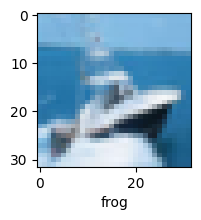

In [ ]:
plot_sample(X_train,y_train,0)

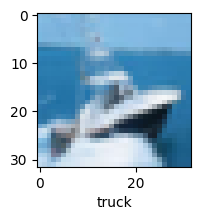

In [ ]:
plot_sample(X_train,y_train,2)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.8125 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.6242 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.5426 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.4813 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.4315 - accuracy: 0.4961


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.4324 - accuracy: 0.4960


[1.4323992729187012, 0.4959999918937683]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report:/n",classification_report(y_test,y_pred_classes))


313/313 [==============================] - 11s 35ms/step
classification report:/n               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.62      0.62      0.62      1000
           2       0.35      0.45      0.40      1000
           3       0.42      0.20      0.27      1000
           4       0.42      0.41      0.41      1000
           5       0.41      0.40      0.40      1000
           6       0.49      0.55      0.52      1000
           7       0.55      0.56      0.55      1000
           8       0.58      0.66      0.62      1000
           9       0.62      0.49      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 46ms/step - loss: 1.4514 - accuracy: 0.4824
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1014 - accuracy: 0.6179
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9781 - accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8962 - accuracy: 0.6910
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8308 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7769 - accuracy: 0.7309
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7268 - accuracy: 0.7481
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6837 - accuracy: 0.7635
Epoch 9/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.6463 - accuracy: 0.7746
Epoch 10/10
1563/1563 [==============================] - 71s 46m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9489 - accuracy: 0.6922


[0.9488840699195862, 0.6922000050544739]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

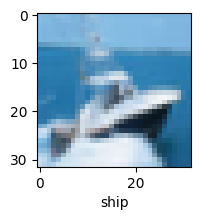

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[1.1404718e-05, 1.1712728e-04, 1.4222512e-04, 9.3557268e-01,
        7.4390339e-04, 2.8807444e-02, 6.0225758e-03, 5.4993288e-05,
        2.8419707e-02, 1.0788912e-04],
       [1.2333883e-04, 2.0269297e-02, 1.6799733e-07, 3.4697710e-08,
        1.0850213e-08, 3.1382792e-11, 1.4937902e-09, 2.8707627e-09,
        9.7958308e-01, 2.4035997e-05],
       [3.4341637e-02, 7.1993344e-02, 2.3483370e-04, 2.8139013e-03,
        7.6638753e-05, 4.0389907e-05, 6.7820546e-04, 9.2226393e-05,
        8.8834631e-01, 1.3824628e-03],
       [9.9011892e-01, 5.5468961e-05, 3.8005246e-03, 4.6890197e-04,
        1.9525316e-03, 2.6780812e-05, 2.9401357e-05, 9.6929725e-05,
        3.3044731e-03, 1.4621903e-04],
       [6.8958661e-07, 9.9870913e-06, 7.6047063e-02, 1.2659572e-02,
        2.0821282e-01, 5.6255753e-03, 6.9744056e-01, 1.0742983e-06,
        2.3100165e-06, 2.4838025e-07]], dtype=float32)

In [ ]:
 y_classes = [np.argmax(element) for element in y_pred]
 y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

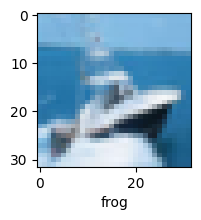

In [ ]:
plot_sample(X_test, y_test, 1009)

In [ ]:
classes[y_classes[1009]]

'frog'

In [ ]:
print("Classification Report: \n" , classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.84      0.78      0.81      1000
           2       0.60      0.57      0.58      1000
           3       0.55      0.46      0.50      1000
           4       0.64      0.66      0.65      1000
           5       0.66      0.54      0.59      1000
           6       0.69      0.85      0.76      1000
           7       0.67      0.80      0.73      1000
           8       0.82      0.77      0.79      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

